# Задачи


1. Какой клиент совершил больше всего успешных операций?


2. С какой платформы осуществляется наибольшее количество успешных операций?


3. Какую платформу предпочитают премиумные клиенты?


4. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)


5. Постройте график распределения числа успешных операций


6. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?


In [17]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Загружаем исходные данные
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-evsa-22/lesson_3/3_user_data.csv', sep=',')
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-evsa-22/lesson_3/3_logs.csv', sep=',')

In [10]:
# Исследуем данные

logs.nunique()
user_data.premium.unique
user_data.head(5)
logs.head(5)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [4]:
#Какой клиент совершил больше всего успешных операций?

df = logs.query('success == True').groupby('client', as_index=False).agg({'success':'count'}).sort_values(by ='success',ascending=False)
df_success_number = df.success.max()

df.query('success == @df_success_number').client.to_list()


[12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719]

In [9]:
#С какой платформы осуществляется наибольшее количество успешных операций?

new = df.merge(logs, on='client', how='inner').rename(columns={'success_x':'success_number', 'success_y':'premium'})
new.groupby('platform', as_index=False).agg({'client':'count'}).sort_values(by='client', ascending=False)

,platform,client
1,phone,2044
0,computer,1099
2,tablet,183


In [6]:
# Какая платформа наиболее популярна среди премиумных клиентов?

new.query('premium == True').groupby('platform', as_index=False).agg({'client':'count'}).sort_values(by='client', ascending=False)

,platform,client
1,phone,2019
0,computer,1090
2,tablet,180


In [7]:
new

,client,success_number,premium,platform,time
0,12179,41,True,computer,1585412991
1,12179,41,True,computer,1585472414
2,12179,41,True,phone,1585407743
3,12179,41,True,phone,1585461727
4,12179,41,True,phone,1585426853
...,...,...,...,...,...
3321,34121,1,True,phone,1585420983
3322,34191,1,True,computer,1585466832
3323,34198,1,True,computer,1585449236
3324,34277,1,True,phone,1585420045


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


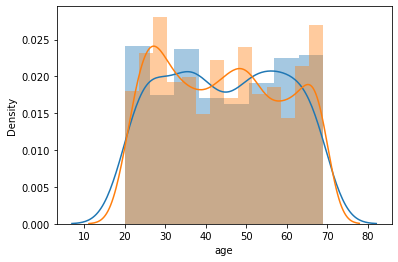

In [15]:
# Визуализация: распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

ddf = logs.merge(user_data, on='client', how='inner')
ddf1 = ddf.query('premium == True')
ddf2 = ddf.query('premium == False')

sns.distplot(ddf1.age)
sns.distplot(ddf2.age)


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


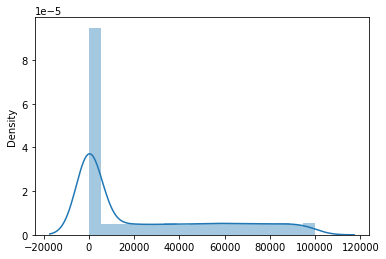

In [16]:
# Постройте график распределения числа успешных операций
# x – число успешных операций
# y – число клиентов, совершивших столько успешных операций

sd = ddf.groupby('client', as_index=False).agg({'success':'count'})
sd1 = sd.query('success ==True')

sns.distplot(sd1)

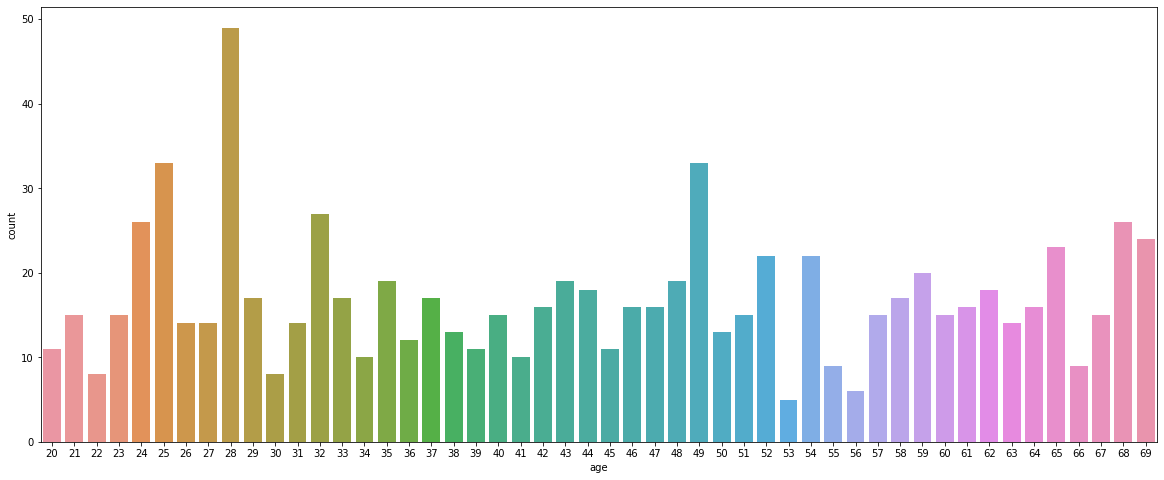

In [18]:
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, 
# По оси x – возраст, y – число успешных операций.

ddf1 = ddf.query('platform == "computer" and success == True')

plt.figure(figsize=(20, 8)) 
sns.countplot(x="age", data=ddf1)
